In [1]:
%pylab inline

import pandas as pd

import sys
import fmt

Populating the interactive namespace from numpy and matplotlib


# Lecture 6: Monte Carlo

Topics:

* Foundation of Monte Carlo
* Random number generation
* Discretize stochastic processes
* Least square MC 

$\renewcommand{bt}[1]{\tilde{\boldsymbol #1}}$

# Foundation of Monte Carlo

Monte Carlo: a town in Monaco principality in SE France, gambling resort.

## Introduction

$\renewcommand{hs}{\hat{\bs s}}$
Monte carlo simulation: 

* one of the most important and widely used numerical methods in scientific computing
* invented in the 40s, born with computers
  * first used in Manhattan project, then for the development of Hydrogen bomb
* widely used in quantitative finance, more popular recently with the rise of GPUs

## Common steps in Monte Carlo:

* generate random samples from probability distributions or stochastic processes
* perform deterministic computations on the samples
* aggregate the results

Typical applications are:
* integrals and expectations 
* quantiles, and other statistical metric

## A classic example

Compute the value of $\pi$ using Monte Carlo:

In [2]:
def sim_pi(ns) :
    es = np.random.uniform(size=[ns[-1], 2])
    d = np.array([x*x + y*y < 1. for x, y in es])
    
    return np.array([4.*np.sum(d[:n])/n for n in ns])

ns = 4**(np.arange(8))*100
ps = sim_pi(ns)

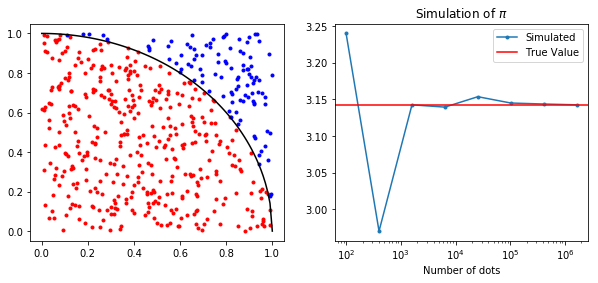

In [3]:
figure(figsize=[10, 4])
subplot(1, 2, 1)

es = np.random.uniform(size=[500, 2])
d = np.array([x*x + y*y < 1. for x, y in es])
dn = np.logical_not(d)
plot(es[d,0], es[d,1], 'r.');
plot(es[dn,0], es[dn,1], 'b.');
x = np.arange(0, 1.01, .01)
plot(x, np.sqrt(1-x*x), 'k');

subplot(1, 2, 2)

semilogx(ns, ps, '.-');
axhline(np.pi, color='r')
legend(['Simulated', 'True Value'], loc='best')

xlabel('Number of dots')
title('Simulation of $\pi$');

* randomly throw dots to a 1x1 square, and count the percentage of dots falling into the quarter circle
* the percentage should be $\frac{\pi}{4}$ in the limit
* with a large number of dots, $4 \times$ the percentage $\rightarrow \pi$. 

## Population and samples

Given a random variable $\renewcommand{bs}{\boldsymbol} \renewcommand{var}{\text{var}} \renewcommand{std}{\text{std}} \renewcommand{cov}{\text{cov}} \tilde{r}$, its true statistics are referred as the population statistics:

* population mean:  $\mu = \mathbb{E}[\tilde r]$
* population variance: $\sigma^2 = \mathbb{E}[\tilde r^2] - \mu^2$

We use $\bs r = [r_1, r_2, ..., r_n]^T$ to represent samples of $\tilde r$:
* samples can be multiple observations of the same R.V
* or multiple draws from the population distribution

The samples themselves are random as well, we can define their statistics:

* sample expectation is $\mathbb{E}[\bs r] = \mu \bs 1$
* for independent samples, covariance matrix: $V = \mathbb{E}[(\bs r - \bs 1 \mu)(\bs r - \bs 1\mu)^T] = \sigma^2 I$

## Sample mean

$\hat{\mu}$ is the mean of the samples:

$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^n r_i = \frac{1}{n} \bs 1^T \bs r$$

$\hat \mu$ is an unbiased estimator of the population mean $\mu$: 

$$\mathbb{E}[\hat{\mu}] = \frac{1}{n} \bs 1^T \bs 1 \mu  = \mu $$

the variance of sample mean:

$$\var[\hat{\mu}] = \cov(\frac{1}{n}  \bs 1^T \bs r, \frac{1}{n}  \bs 1^T \bs r) = \frac{1}{n^2} \bs 1^T V \bs 1 = \frac{1}{n^2} \bs 1^T \sigma^2 I \bs 1 = \frac{\sigma^2}{n}$$

* the std dev of $\hat{\mu}$ decrease at a rate of $\frac{1}{\sqrt{n}}$
* this is the foundation of the Monte Carlo method

## Sample variance

$\hat \sigma^2$ is the variance of the sample:

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (r_i - \hat{\mu})^2 = \frac{1}{n} (\bs r -  \bs 1 \hat{\mu})^T (\bs r - \bs 1 \hat{\mu})$$ 

$\hat{\sigma}^2$ is an biased estimator of the population variance $\sigma^2$:

$$
\begin{array}
\\ \mathbb{E}[\hat{\sigma}^2] &= \mathbb{E}\left[\frac{1}{n}\left(\bs r^T \bs r - 2 \bs r^T \bs 1 \hat \mu + \bs 1^T \bs 1 \hat \mu^2\right)\right] = \mathbb{E}\left[\frac{1}{n}\bs r^T \bs r - \hat \mu^2\right] \\
&= \mathbb{E}[\tilde r^2] - \mathbb{E} [\hat \mu^2] = (\sigma^2 + \mu^2) - (\frac{\sigma^2}{n} + \mu^2) = \frac{n-1}{n} \sigma^2
\end{array}
$$

$\hat{s}^2 = \frac{n}{n-1}\hat{\sigma}^2$ is therefore an unbiased estimator of $\sigma^2$.
* $\hat s^2$ follows Chi square distribution, converging to normal distribution for large $n$ (central limit theorem)

## Sample standard deviation

 $$\hat s = \sqrt{\hat s^2} = \sqrt {\frac{1}{n-1}\sum_{i=1}^n (r_i - \hat{\mu})^2} $$
 
* $\hat s$ is routinely used as an estimator for $\sigma$
* $\hat s$ follows Chi distribution, which converges to normal for large $n$
* error and standard deviation $\hat s$ are often used interchangeably

Is standard deviation is an unbiased estimator of $\sigma$?

* No, because of Jensen's inequality:

$$ \mathbb{E}[\hat s] = \mathbb{E}[\sqrt{\hat s^2}] \le \sqrt{\mathbb{E}[\hat s^2]} = \sqrt{\sigma^2} = \sigma$$

## Variance of sample variance

$$\var[\hat s^2] = \frac{1}{n}(\mu_4 - \sigma^4 \frac{n-3}{n-1}) \approx \frac{\beta - 1}{n} \sigma^4$$

  * $\mu_4 = \mathbb{E}[(\tilde{r} - \mu)^4]$, population's 4th central moment
  * $\beta = \frac{\mu_4}{\sigma^4}$ is the population's kurtosis
  * the derivation is rather [tedious](http://math.stackexchange.com/questions/72975/variance-of-sample-variance)

## Monte Carlo error

The MC error of $\hat \mu$ can be estimated as $\frac{\hat s}{\sqrt{n}}$:
* the true MC error is $\frac{\sigma}{\sqrt{n}}$, but $\sigma$ is usually unknown
* $\frac{\hat s}{\sqrt{n}}$ is a biased estimator to the true MC error, but good enough

The error of MC error is therefore $\std(\frac{\hat s}{\sqrt n}) = \frac{\std(\hat s)}{\sqrt n}$: 
* we know the var of sample var, but we need std of sample std
* can we simply compute $\std(\hat s) \approx \sqrt{\std(\hat s^2)} = \sqrt[4]{\var(\hat s^2)} $ ?

## Std dev of sample std dev

Use normality: $\hat s = \mu_s + \sigma_s \tilde \epsilon$, where $\tilde \epsilon \sim N(0, 1)$:

$$
\begin{array}{l}
 \mathbb{E}[\hat s^2] &= \mu_s^2 + \sigma_s^2  =  \sigma^2 \\
 \var[\hat s^2] &= \var[ 2\mu_s\sigma_s\tilde\epsilon + \sigma_s^2 \tilde \epsilon^2] = 4\mu_s^2\sigma_s^2 + 2\sigma_s^4 \approx \frac{(\beta-1)\sigma^4}{n}
\end{array}$$

Note that $\var[\tilde \epsilon^2] = \mathbb{E}[\tilde \epsilon^4] - \mathbb{E}^2[\tilde \epsilon^2] = 2$ and $\cov[\tilde \epsilon, \tilde \epsilon^2] = 0$, then:

$$\sigma_s^4 - 2 \sigma^2 \sigma_s^2 + \frac{(\beta-1)\sigma^4}{2n} = 0$$

thus $\sigma_s = \std(\hat s) \approx \sigma\sqrt{\frac{\beta-1}{4n}}$, not even close to $\sqrt[4]{\var(\hat s^2)} \approx \sigma\sqrt[4]{\frac{\beta-1}{n}}$
* $\mu_s = \mathbb E [\hat s] = \sigma \sqrt{1-\frac{\beta-1}{4n}}$
* the other root of $\sigma_s^2$ is greater than $\sigma^2$, ignored

## Population and sample statistics

| | Definition | Mean | Variance |
|:--:| :--:|:---:|:--:|
| Population | $\tilde r$ | $\mu$ | $\sigma^2$ |
| Sample mean | $\hat u = \frac{1}{n}\bs 1^T \bs r$ | $\mu$ | $\frac{\sigma^2}{n}$ |
| (adjusted) <br> Sample variance | $\hat s^2 = \frac{1}{n-1} \sum_i (r_i - \hat \mu)^2 $ | $\sigma^2$ | ~$\frac{\beta - 1}{n} \sigma^4$|
| Sample stddev | $\hat s$ | ~$\sigma \sqrt{1-\frac{\beta-1}{4n}} $ | ~$\frac{\beta-1}{4n}\sigma^2$ |


$\sigma^2$ can be well approximated by the unadjusted sample variance:

$$\hat\sigma^2 = \frac{1}{n} \sum_i (r_i - \hat \mu)^2 = \frac{1}{n}\sum_i r_i^2 - \hat \mu^2 $$

  * easy to implement, just keep track of the cumulative sum of squares
  * the bias in $\hat \sigma^2$ can be safely ignored as $n$ is large

## Numerical examples

Consider the example of computing $\pi$ using MC:
$$\renewcommand{ind}{1{\hskip -2.5 pt}\hbox{l}}$$

$$\frac{\pi}{4} = \mathbb{E}\left[\ind\left(\sqrt{\tilde x^2 + \tilde y^2} < 1\right)\right]$$

where $\mathbb{\ind}(\cdot)$ is an indicator function, the population mean, variance and 4th moment are:

$$\begin{array}{l}
\mu &= \mathbb{E}[\tilde \ind] = \frac{\pi}{4} \\
\sigma^2 &= \var[\tilde \ind] = \mathbb{E}[\tilde \ind^2] - \mu^2 = \frac{4\pi - \pi^2}{16} \\
\mu_4 &= \mathbb{E}\left[\left(\tilde \ind - \mu\right)^4\right] = \frac{\pi}{4}(1-\frac{\pi}{4})^4 + (1-\frac{\pi}{4})(\frac{\pi}{4})^4 \\
\beta &= \frac{\mu_4}{\sigma^4} = 2.933
\end{array}
$$

The variance and error of sample statistics:

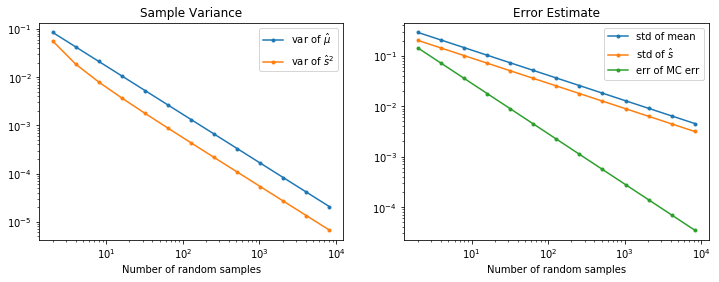

In [4]:
u = np.pi/4
v = u*(1-u)
u4 = np.pi/4*(1-np.pi/4)**4 + (1.-np.pi/4)*(np.pi/4)**4

ns = 2**(np.arange(1, 14))
var_u = v/ns
var_var = (u4 - v*v*(ns-3)/(ns-1))/ns

beta = u4/v**2

fig = figure(figsize=[12, 4])
subplot(1, 2, 1)
loglog(ns, np.transpose([var_u, var_var]), '.-')
legend(['var of $\hat \mu$', 'var of $\hat s^2$']);
xlabel('Number of random samples')
title('Sample Variance');

ax = fig.add_subplot(122)
loglog(ns, np.transpose([np.sqrt(var_u), np.sqrt((beta-1.)/4./ns)*np.sqrt(v), np.sqrt((beta-1.))/2./ns*np.sqrt(v)]), '.-');
title('Error Estimate')
legend(['std of mean', 'std of $\hat s$', 'err of MC err'], loc='best');
xlabel('Number of random samples');

* it is prudent to monitor the error of MC error (most people don't)
* the err of MC err is more pronounced for fat tailed distributions, with large $\beta$

## Estimate mean and volatility

Let's revisit the estimation of stock return's mean and volatility, suppose:

* we have 10Y daily return data, $r_i$
* the true volatility is 25% annualized, i.e. $\sigma = .25$
* the returns are roughly normal, i.e. $\beta = 3$

The historical mean estimator $\hat u = \frac{1}{n}\sum_i r_i $ has an error of:
* $\std(\hat \mu) = \frac{\sigma}{\sqrt{10}} = 0.079$, the error is large because we only have 10 independent sample
* using daily return does not help either: $\std(\hat \mu) = 250 \frac{\sigma/\sqrt{250}}{\sqrt{10 \times 250}} = 0.079$

The vol is estimated as the standard deviation $\hat s$ of the daily return $r_i$:
* error in annualized vol is $\sigma{\sqrt{\frac{\beta-1}{4n}}} = 0.0035$, very accurate
* we used all 2500 daily samples

In [5]:
print(.25/sqrt(2500*2))
print(.25/sqrt(10))

0.00353553390593
0.0790569415042


## Batching

Advanced MC techniques often involves dependent samples 
* the MC error estimate of $\frac{\hat s}{\sqrt{n}}$ is no longer valid

Batching is a generic method to estimate MC errors with dependent samples
* Repeat the MC simulation $b$ times, and obtain $\hat{\mu}_i$ for $i = 1 ... b$ 
  * each batch has **different** random seeds, *ceteris paribus*
* $\hat{\mu}_i$ are independent between batches, 
  * the variance of $\hat \mu$ can be estimated directly  $\hat s_b^2 = \frac{1}{b-1} \sum_i (\mu_i^2 - \bar{\mu})^2$ 
  * $\bar{\mu} = \frac{1}{b} \sum_i\hat{\mu}_i$ is the batch mean estimator, its error is $\frac{\hat s_b}{\sqrt{b}}$

## Why Monte Carlo?

The MC example of $\pi$ is really to solve the integral of: 

$$\int_0^1\sqrt{1-x^2}dx = \frac{\pi}{4}$$

* MC is inefficient, only converges at $\propto \frac{1}{\sqrt{n}}$
* In comparison, Simpson rule converges at $\propto \frac{1}{n^4}$

However, MC shines because its convergence is dimension independent:

| Dimension | Simpson Integration Points | Equivalent MC samples | Cost Ratio (MC/Simpson) |
| :----: | :----: | :----: | :----: | :----: |
| 1 | $10$ | $10^{8} $ | $10^{7}$ |
| 5 | $10^5$ | $10^{8}$ | $1000$ |
| 10 | $10^{10}$ | $10^{8}$ | $0.01$ |
| 20 | $10^{20}$ | $10^{8}$ | $10^{-12}$ |

## Curse of dimensionality

In Finance, we routinely run into very high dimensionalities, every source of randomness is a separate dimension:

* interest rate: LMM models 3M forwards up to 30Y
* basket options: often have tens of names
* synthetic CDOs: hundreds of issuers in the portfolio
* mortgage securities: monthly payments up to 30 years

Most numerical methods fail at high dimensionality
* PDE: 4 dimension is the practical limit
* Tree: rarely more than 3 dimensions

## Randomness is dimensionality proof

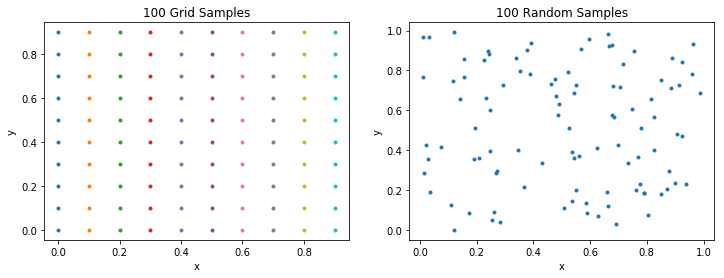

In [6]:
x = np.arange(0, 10)*.1
y = np.arange(0, 10)*.1
xm, ym = np.meshgrid(x, y)

figure(figsize=[12, 4])
subplot(1, 2, 1)
plot(xm, ym, '.');
xlabel('x')
ylabel('y')
title('100 Grid Samples');

subplot(1, 2, 2)
xs = np.random.uniform(size=[2, 100])
plot(xs[0,:], xs[1,:], '.');
title('100 Random Samples');
xlabel('x')
ylabel('y');

Monte Carlo is effective in combating high dimensions:

* the same set of random samples cover all dimensions equally

## $\mathbb{Q}$ measure applications

#### Derivative pricing:
$$ \frac{v(t_0)}{m(t_0)} = \mathbb{E}^\mathbb{Q}\left[\frac{v(t)}{m(t)} \bigg| \mathcal{F}_{t_0}\right] $$
* $m(t)$ is a numeraire seccurity, $\mathbb{Q}$ is the measure induced by the numeraire $m(t)$
* Often used for pricing high dimensional exotic and path dependent derivatives

#### XVA adjustments: CVA/FVA/DVA
* an  active research area
* XVAs can be expressed in expectations

## $\mathbb{P}$ measure applications

#### Market Risk
* Value at Risk: $\mathbb{P}[v(T) < \text{VaR}_\alpha] = \mathbb{E}_t[\ind(v(T) < \text{VaR}_\alpha)] = \alpha$

#### Counterparty credit risk: 
* EE (expected exposure): $e_t = \mathbb{E}[\max(v_t, 0)] = \mathbb{E}[v_t \ind(v_t > 0)]$ 
* PFE (potential future exposure): $\mathbb{P}[v_t \ind(v_t > 0) < \text{PFE}_\alpha] = \alpha$

#### Capital allocation
* a new area where the MC method is successfully applied

## Advantages of Monte Carlo

There are good reasons why Monte Carlo is widely used in quant finance:

* dimensionality independent
* generic: widely applicable
* robust: can handle complicated payoff
* easy to implement and modify
* precise error estimate
* easy to add more samples on the fly
* can be made very fast for many problems (next lecture)
* often used to test more advanced pricing technique, like PDE

# Random number generation

Robert Coveyou: the generation of random numbers is too important to be left to chance.

## True and pseudo random numbers

True random number generators (T-RNG) observe random physical processes:
* often involves quantum effects: radioactive decay, electrical/thermal noise etc.
* costly and slow
* mostly used in cryptography that requires a high level of security

Pseudo random number generators (P-RNG) are computer software that 
* produce number sequence that only appears to be random
* cheap and fast
* can be initialized (seeded) to different states
* states can be stored and recovered, convenient for MC

## Pseudo random number generators

Building good P-RNG requires highly specialized skills:

* must pass rigorous statistical tests 
* numerical scientists have devoted their careers to build good P-RNGs
* always use a good P-RNG library and never write your own
  * ```random()``` in Excel is implemented [incorrectly](http://www.pages.drexel.edu/~bdm25/excel-rng.pdf), don't use it for anything serious

## Mersenne Twister (MT19937)

The most popular P-RNG:
* often the default P-RNG for MC
  * the default choice of Python's ```numpy.random.uniform```
* very long cycle of $2^{19937} − 1$ and excellent statistical properties
* suitable for MC applications, but **not** good for cryptography
* very fast: ~100M random numbers per second on a modern PC

## Non-uniform random numbers

P-RNGs produces uniform random numbers between [0, 1]
* RNs of other distributions can be built by transformations

Given the cumulative distribution function $F(x)$, $\tilde x = F^{-1}(\tilde u)$ transforms a uniform $\tilde u$ to the desired distribution:

$$
\mathbb{P}[\tilde x < x]= \mathbb{P}[F^{-1}(\tilde u) < x] = \mathbb{P}[\tilde u < F(x)] = F(x)
$$

* a universal method to produce non-uniform RNs
* works the best when $F^{-1}(\cdot)$ can be compute cheaply and accurately

## Box-muller

Normal random number is the most important of all:
* most quant Finance models are driven by Brownian motions
* fast and accurate inversion of normal CDF weren't known till recently

Box-muller is a classic method to transform independent uniform RNs to independent  normal RNs:
* takes 2 independent uniforms and produce 2 independent normals
* its [polar form](http://en.wikipedia.org/wiki/Marsaglia_polar_method) is faster and more stable, which is behind Python's ```numpy.random.normal```
* the polar form is a rejection algorithm: the number of output normal RNs is less than the input uniforms
  * about 21% of input uniforms are rejected (wasted)

## Normal inversion

Numerical inversion of normal CDF is an effective alternative to generate normal random numbers:
* fast and accurate numerical inversion of the normal CDF were [discovered recently](http://home.online.no/~pjacklam/notes/invnorm/)
* based on polynomial approximation, accuracy is ~$10^{-9}$
* every uniform RN produce a normal RN output, more convenient than the polar Box-muller
* works well with low discrepancy sequences (next lecture)

Normal inversion is often preferred over the Box-muller.

How to create correlated normal RNs from independent normals RNs?

# Discretize stochastic processes

Mark Twain: if you must be indiscrete, be discrete in your indiscretion

## Discretization

To simulate a stochastic differential equation (SDE) numerically, we have to discretize it first.
* $\bs \tau = [0, \delta, 2\delta, \cdots, n\delta]^T$ represents a discretized time grid

$s(t)$ is the true 1-D stochastic processes as defined by a SDE 
 * same for multi-dimensional processes
 * $s(\bs \tau)$ is a vector of the true stochastic process valued at discrete time
  
$\hat s(t; \delta)$ is a discretization of $s(t)$
  * $\hat s(t; \delta)$ is only defined at discrete time grid $t \in \bs \tau$
  * discretization is a form of approximations, $\hat s(t; \delta) \ne s(t)$ in general

## Discretization error

The discretization error are application specific:

European style of derivatives: $\mathbb{E}[f(s(t))]$
  * only depends on the distribution of $s(t)$ at a single time horizon $t$
  * $f(\cdot)$ is the payoff function 

Path dependent derivatives: $\mathbb{E}[f(s(\bs \tau))]$
  * payoff function $f(\cdot)$ depends on the full path of $s(\bs \tau)$
  * $\bs \tau$ could be daily grid
  * e.g. Asian options, barrier options, MBS/ABS and CDOs etc

## Order of Convergence 

####Weak convergence:

* is the accuracy in the distribution of $s(t)$ at a specific $t$:
* a discretization has n-th order weak convergence if

$$\mathbb{E}[s(t) - \hat s(t; \delta)] = O(\delta^n)$$ 

####Strong convergence:

* defined to be the accuracy in capturing the whole trajectory of $\bs s$:
* a discretization has n-th order strong convergence if

$$\mathbb{E}\left[\left\Vert s(\bs \tau) - \hat s(\bs \tau; \delta) \right\Vert\right] = O(\delta^n)$$

## Diffusion process

Generic multi-dimensional diffusion SDE: 

$$ d \bs s(t) = \bs \mu(\bs s, t) dt + \Sigma(\bs s, t) d \bs w(t) $$

* $\bs{s, \mu}$ are vectors, $\Sigma$ is a matrix 
* $\bs w$ is a multi-dimensional Brownian process 
  * with correlation matrix $C\;dt = d \bs w d \bs w^T$
* $\Sigma$ is rectangular if the dimensions of $\bs w$ and $\bs s$ are different 

## Euler discretization

The main workhorse for MC applications in quant finance:

$$\renewcommand{hs}{\hat{\bs s}} \hs(t + \delta) = \hs(t) + \bs \mu(\hs, t) \delta + \Sigma(\hs, t) L\bs \epsilon\sqrt{\delta}  $$

* generic and easy to implement
* $L$ is the Cholesky decomposition of the correlation matrix: $C = LL^T$
* $\bs \epsilon$ are *independent* standard normal random numbers,  $\sim N(0, 1)$
* $\mathbb{E}[\frac{L\bs \epsilon\sqrt{\delta} (L\bs \epsilon\sqrt{\delta})^T}{\delta}] = \mathbb{E}[L\bs \epsilon\bs \epsilon^TL^T]
= L\mathbb{E}[\bs \epsilon\bs \epsilon^T]L^T = LL^T = C$

## Convergence of Euler discretization

But Euler discretization is slow in convergence:
* order 1 weak convergence, $O(\delta)$
* order $\frac{1}{2}$ strong convergence, $O(\sqrt{\delta})$

For processes with known analytical solutions, more efficient sampling method can be devised

## Geometric Brownian motion

The most common process to model asset prices:

$$\frac{dx(t)}{x(t)} = \mu dt + \sigma dw(t)$$

its analytical solution is:

$$x(t) = x(t_0) e^{(\mu - \frac{1}{2}\sigma^2)(t-t_0) + \sigma w(t)}$$

* its trajectory can be **exactly** sampled using arbitrary time steps ($\infty$ order of strong convergence)
* extends trivially to multi-dimensional GBM

## Ornstein-Uhlenbeck process:

$$dx(t) = \kappa(\bar x - x(t)) dt + \sigma dw(t)$$

* commonly used in interest rate modeling (a.k.a. Vasicek model) and empirical studies
* the most tractable and widely used process to capture mean reversion

The analytical solution is
$$\small x(t) = x(t_0)e^{-\kappa (t-t_0)} + \bar x (1 - e^{-\kappa (t-t_0)}) + \int_{t_0}^t\sigma e^{\kappa(s-t)}dw(s)$$

the Ito integral $e(t) = \int_{t_0}^t\sigma e^{\kappa(s-t)}dw(s)$ is normally distributed:

$$e(t) \sim N\left(0, \frac{\sigma^2}{2\kappa}(1-e^{-2\kappa (t-t_0)})\right)$$
  
the trajectory of $x(t)$ in the OU can be sampled **exactly** with arbitrary time steps by drawing $e(t)$ instead of $w(t)$:
  * extension to multi-dimensional OU process requires some care as $\cov(e_i, e_j) \ne \cov(w_i, w_j)$

## CIR process

Cox-Ingersoll-Ross (CIR) process:

$$dx(t) = \kappa(x(t) - \bar x) dt + \sigma \sqrt{x(t)} dw(t)$$

* $x(t) \ge 0$, zero is attainable if $\sigma^2 > 2\kappa\bar x$ 
* no known analytical solution for $x(t)$
* often used to model interest rates and volatility, e.g. Heston model

Euler discretization could lead to negative values for $x(t)$

* In practice, ad-hoc floors or reflections are often used to avoid negative values, at the cost of significant bias in $x(t)$

## Log-Euler scheme

A better solution to prevent CIR process from becoming negative is to apply the transformation $y(t) = \log(x(t))$:

$$\small dy(t) = \frac{1}{x(t)}\left(\kappa(x(t) - \bar x) - \frac{\sigma^2}{2} \right) dt + \frac{\sigma}{\sqrt{x(t)}}dw(t) $$

* Euler scheme can then be applied to sample $y(t)$, without added bias
* it can be easily extended to sample any bounded processes
* But in practice, we still need a reflective bound for $y(t)$ otherwise it goes to $-\infty$ quickly.

## Milstein sampling

For a diffusion SDE of the form:
 
$$ dx_t = u(x_t)dt + \sigma(x_t) dw_t $$
 
Observe that both $u(x_t)$ and $\sigma(x_t)$ are stochastic through $x_t$:
 
$$ d u_s = (\cdot) ds + \dot u_s \sigma_s dw_s,  \;\; d\sigma_s = (\cdot) ds + \dot \sigma_s \sigma_s dw_s $$
 
where $\dot u_s = \frac{du(x_s)}{dx_s}, \dot \sigma_s = \frac{d\sigma(x_s)}{dx_s}$.
 
All corrections are higher order than $d t$ except the $dw_s dw_t$ term (note $t < u < s < t+\delta t$):
 
$$ \delta x_t = u_t \delta t + \sigma_t \delta w_t + \int_t^{t+\delta t}\int_t^{s}\dot\sigma_u \sigma_s dw_u dw_s $$

 The last correction term can be approximated as:
$$ \small \begin{eqnarray}
\sigma_t\int_t^{t+\delta t}\int_t^{s}\dot\sigma_u dw_u dw_s &\approx& \sigma_t\dot\sigma_u \int_t^{t+\delta t}\int_t^{s} dw_u dw_s
= \sigma_t\dot\sigma_t \int_t^{t+\delta t} (w_{s}-w_t)dw_s \\
&=& \sigma_t\dot\sigma_t \left(\int_t^{t+\delta t} w_{s}dw_s - \int_t^{t+\delta t}w_t dw_s\right) \\
&=& \sigma_t\dot\sigma_t \left(\int_t^{t+\delta t} w_{s}dw_s - w_t(w_{t+\delta t} - w_t)\right)
\end{eqnarray}$$
 
Note that $\int w_t dw_t = \frac{1}{2}(w_t^2 - t)$, the term in the bracket becomes:
$$ \small \frac{1}{2} (w_{t+\delta t}^2 - w_t^2) - \frac{1}{2}\delta t - w_t(w_{t+\delta t} - w_t) = \frac{1}{2}(w_{t+\delta t} - w_t)^2 - \frac{\delta t}{2} \approx \frac{1}{2}(\delta^2w - \delta t) $$
 
This term vanishes for infinitesimal $dt$ but not for finite sample size $\delta t$. 

## Properties of Milstein

Therefore, if we sample $\delta w_t = \tilde z \sqrt{\delta t}$, we add the following correction term:
 
$$\delta x = u(t) \delta t + \sigma(t) \sqrt{\delta t} \tilde z + \frac{1}{2}\sigma \dot \sigma (\tilde z^2 - 1) \delta t $$

* Milstein sampling is 1st order in strong convergence and weak convergence
* But it is non-trivial to extend Milstein to multi-dimensional 

## Stability of Euler discretization

Consider a one-dimensional OU process, and its Euler discretization:

$$\small \begin{array}
\\ dx(t) &= \kappa(\bar x - x(t)) dt + \sigma dw(t) \\
x(t_{i+1}) &= x(t_i) + \kappa(\bar x - x(t_i)) \delta + \sqrt{\delta} \sigma \epsilon_i \\
&= (1 - \kappa \delta) x(t_i) + \kappa \bar x \delta + \sqrt{\delta} \sigma \epsilon_i \\
\mathbb{E}[x(t_{i+1})] &= (1 - \kappa \delta) \mathbb{E}[x(t_i)] + \kappa \bar x \delta
\end{array}$$

the expectation explodes if the $| 1 - \kappa \delta | > 1$, i.e., $\delta > \frac{2}{\kappa}$

In [7]:
import proc

u = .05
k = 10.
dt = 2/k
n = int(20./dt)
sigma = .02

ou = proc.OU(k=k, u=u, sig=sigma)
es = np.random.normal(size=[1, n])

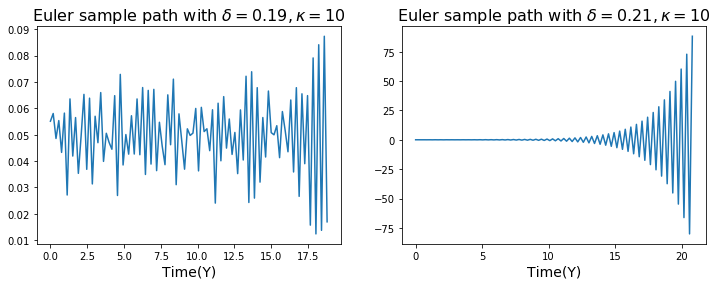

In [8]:
et = .01
figure(figsize=[12, 4]);
subplot(1, 2, 1)
dt = 2/k - et
paths = ou.draw(es, u, dt)
plot(np.arange(n)*dt, paths.T)
xlabel('Time(Y)', fontsize=14);
title('Euler sample path with $\delta = %g, \kappa=%g$' % (dt, k), fontsize=16);

subplot(1, 2, 2)
dt = 2/k + et
paths = ou.draw(es, u, dt)
plot(np.arange(n)*dt, paths.T)
xlabel('Time(Y)', fontsize=14);
title('Euler sample path with $\delta = %g, \kappa=%g$' % (dt, k), fontsize=16);

## Discretization vs Monte Carlo error

Suppose we draw $n$ independent paths of $\hat s(\bs \tau; \delta)$, where $\bs \tau$ consists of $m$ discrete time samples.
* the total computation cost is $\propto mn$

There are two types of errors in Monte Carlo simulation of SDEs:

* Discretization error:  $\epsilon_d \propto (\frac{1}{m})^\gamma$
* Monte Carlo error: $\epsilon_{s} \propto \frac{1}{\sqrt{n}}$

The two types of errors are independent, thus the total variance is:

$$ \epsilon^2 = c_1 \epsilon_d^2 + c_2\epsilon_{s}^2 = \frac{c_1}{m^{2\gamma}} + \frac{c_2}{n}$$

* where $c_1, c_2$ are constant (likely unknown) 

## Optimal choice of $\delta$

Given a fixed computation budget of $mn = c$, the best allocation between $m$ and $n$ can be found by solving:

$$\begin{array}{c} \min_{m, n} \left(\frac{c_1}{m^{2\gamma}} + \frac{c_2}{n}\right) \\
\text{subject to: } mn = c
\end{array}$$

apply the Lagrange multiplier:

$$\small \begin{array}{l} 
l &= \left(\frac{c_1}{m^{2\gamma}} + \frac{c_2}{n}\right) + \lambda(mn - c) \\
\frac{\partial l}{\partial m} &= -c_1\frac{2\gamma}{m^{2\gamma+1}} + \lambda n = 0 \\
\frac{\partial l}{\partial n} &= -c_2\frac{1}{n^2} + \lambda m = 0 \\
\lambda mn &= \frac{2c_1\gamma}{m^{2\gamma}} = \frac{c_2}{n}
\end{array}$$

therefore the optimal strategy is to maintain $\frac{m^{2\gamma}}{n} = \frac{2c_1\gamma}{c_2}$

## Richardson extrapolation

Recall Euler discretization is of 1st order weak convergence:

$$\mathbb{E}[f(\hs(t; \delta))] = \mathbb{E}[f(\bs s(t)] + c \delta + O(\delta^2)$$

Richard extrapolation can be applied to get 2nd order weak convergence: 

$$\begin{array}{l} 
\mathbb{E}[f(\hs(t; 2\delta))] &= \mathbb{E}[f(\bs s(t)] + 2c \delta + O(\delta^2) \\
2\mathbb{E}[f(\hs(t; \delta))] - \mathbb{E}[f(\hs(t; 2\delta))] &= \mathbb{E}[f(\bs s(t)] + O(\delta^2) \\
\mathbb{E}[2f(\hs(t; \delta)) - f(\hs(t; 2\delta))] &= \mathbb{E}[f(\bs s(t)] + O(\delta^2)
\end{array}$$

Therefore the estimator $2f(\hs(t; \delta)) - f(\hs(t; 2\delta))$ is 2nd order weak convergence.

## Cost of Richardson extrapolation

The variance of the estimator with Richardson extrapolation is:

$$\small \begin{array}{l}
\var[2f(\hs(t; \delta)) - f(\hs(t; 2\delta))] \\
= \var\left[2f(\hs(t; \delta))\right] + \var\left[f(\hs(t; 2\delta))\right] - 2 \cov\left[2f(\hs(t; \delta)), f(\hs(t; 2\delta))\right]  \\
= 4\sigma_\delta^2 + \sigma_{2\delta}^2 - 2\rho\sigma_\delta\sigma_{2\delta} \gtrsim 3\sigma^2
\end{array}$$

* Given $\sigma_{2\delta} \approx \sigma_\delta \approx \sigma$, the minimal variance is ~$3\sigma$ when $\rho = 1$
* Richardson extrapolation increases the MC cost by a factor of 3 at least.

## Richardson extrapolation implementation

The following implementation maximizes the correlation between $f(\hs(t; \delta))$ and $f(\hs(t; 2\delta))$:  

1. draw $m$ independent standard normal random vectors: $\bs z_1,  \bs z_2, 
\bs z_3, ..., \bs z_m$,  
2. use $\bs z_1\sqrt{\delta}, \bs z_2\sqrt{\delta}, \cdots , \bs z_m\sqrt{\delta}$ as the Brownian motion increments to simulate $\hs(t; \delta)$
3. use  $(\bs z_1 + \bs z_2)\sqrt{\delta}, (\bs z_3+\bs z_4)\sqrt{\delta}, \cdots $ as the Brownian motion increments to simulate $\hs(t; 2\delta)$

# Least square MC

Lewis Carroll: it's a poor sort of memory that only works backwards.

## Early exercise

Early exercise (American or Bermudan option):
* the option holder can exercise before the option expiry

The value of American put at time $t_i$ is:
$$ v(t_i) = \max\left(\left(k-s\left(t_i\right)\right)^+, \mathbb{E}\left[v(t_{i+1})e^{-r\delta}\biggr|\mathcal{F}_{t_i}\right]\right)$$
* the first term inside the $\max$ is the exercise value
* the second term is the continuation value

Similarly, the value of American call at time $t_i$ is:
$$ v(t_i) = \max\left(\left(s(t_i)-k\right)^+, \mathbb{E}\left[v(t_{i+1})e^{-r\delta}\biggr|\mathcal{F}_{t_i}\right]\right)$$

these equations are commonly known as the Bellman equation.

## Exercise Boundary

Is it optimal to early exercise?
* it is never optimal to early exercise call option when the underlying stock does not pay dividend
* it may be optimal to early exercise a deep in the money put option

The optimal exercise boundary of American put is a function of stock price and time: $b(s(t), t)$
<center>
<img src="img/putexer.png" width=400 height=400>
</center>

## Free boundary problem

The American option's value can be expressed as an optimization of:

$$ v(b^*(t)) = \max_{b(t)} [v\left(b\left(t\right)\right)] $$

* $v(b(t))$ is the option value with an exercise boundary of $b(t)$
* $b^*(t)$ is the optimal exercise boundary that maximizes $v(b(t))$

This types of free boundary problem poses a serious challenge to MC
* if $b^*(t)$ were known, the problem is trivial
* naive approaches for solving $b^*(t)$ leads to MC inside an optimizer, which is prohibitively expensive

## The stone age

Before 2000, it was generally accepted that MC cannot solve these free boundary problems.
* American and Bermudan options were priced using PDE and trees
  * more natural for solving $b^*(t)$ as they go backwards in time
* However, PDE and trees can't deal with high dimensionalities

## Stock paths

We draw 100,000 stock paths to 1Y with time grid $\delta = 0.01$ from the GBM:
* we can store all paths in memory ($100,000 \times 100 \times 8 \approx 76$MB)
* European option is priced to adequate accuracy

In [9]:
print(1e5*100*8/1024/1024)

76.2939453125


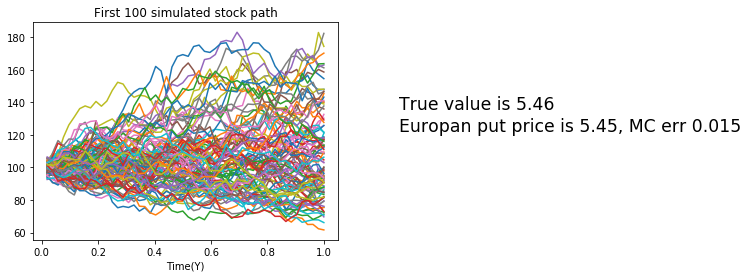

In [10]:
t, m, r, s0, k, vol = 1., 52, .1, 100, 100, .25

dt = t/m 
n = 400000

ts = np.arange(1, m+1)*dt

gbm = proc.GBM(r, vol)
spath = gbm.draw(np.random.normal(size=[n, m]), s0, dt)
spath2 = gbm.draw(np.random.normal(size=[n, m]), s0, dt)

eputs = np.maximum(k - spath[:,-1], 0)*np.exp(-r*t)
u = np.mean(eputs)
e = np.std(eputs)/sqrt(n)

fig = figure(figsize=[12, 4])
subplot(1, 2, 1)
plot(ts, spath[:100].T);
xlabel('Time(Y)')
title('First 100 simulated stock path');

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(0, .5, "Europan put price is %.2f, MC err %.2g" % (u, e), size="xx-large");
ax.text(0, .6, "True value is %.2f" % (5.46), size="xx-large");

## Path-wise optimal exercise

Given the simulated path, one may propose the following simple method to price American option:
1. for each simulated path, determine its optimal exercise time $t^*$
2. then compute the American put's value as 

$$v(0) = \frac{1}{n} \sum_i e^{-rt^*_i}\left(k-s(t^*_i)\right)^+$$

This algorithm is easy to implement, but ...

In [11]:
import fmt

truv = 6.523

disc = np.exp(-r*ts)
to = [np.argmax(np.maximum(k-p, 0)*disc) for p in spath]
v = np.mean([np.max(np.maximum(k-p, 0)*disc) for p in spath])

ne = 1000
te, se =  map(np.array, zip(*[((o+1)*dt, spath[i, o]) for i, o in enumerate(to[:ne])]))
me = np.argmin(se)

df = pd.DataFrame(np.array([v, truv]), index=['Pathwise Optimal', 'True Value'], columns=['American Put'])
fmt.displayDF(df.T, "3f", 4)

,Pathwise Optimal,True Value
American Put,12.253,6.523


## Perfect foresight

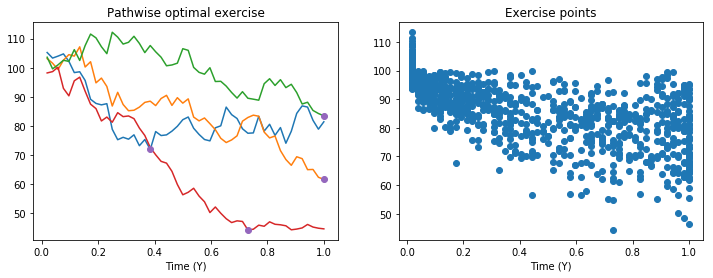

In [12]:
figure(figsize=[12, 4])
subplot(1, 2, 1)
nidx = np.array([0, 1, 2, me])
plot(ts, spath[nidx].T)
plot(te[nidx], se[nidx], 'o')

xlabel('Time (Y)')
title('Pathwise optimal exercise')

subplot(1, 2, 2)
plot(te, se, "o");
xlabel('Time (Y)')
title('Exercise points');

the reason is that it uses the future information, i.e., with supernatural ability:
* it gives an upper bound of the option value
* it does not define an exercise boundary

## Least square Monte Carlo

Least square is an important breakthrough in MC, it is the method of choice for early exercise.
* invented by quants in Solomon brothers, also known as the Longstaff-Schwartz MC after the creators

The key insight is that the conditional expectation in Bellman equation can be solved by regression and backward-induction.

$$ v(t_i) = \max\left(\left(k-s\left(t_i\right)\right)^+, \mathbb{E}\left[v(t_{i+1})e^{-r\delta}\biggr|\mathcal{F}_{t_i}\right]\right)$$

We present it using a numerical example of American put:
* maturity 1Y, stock price $s(0) = 100$, strike $k=100$, vol $\sigma = .25$
* continuous compounded discount rate of $r = 0.1$
* the exact value of this American put is 6.523
* the European option worths 5.460

In [13]:
import mc

put_ev = lambda x : np.maximum(k - x, 0)
v_b, e_b, b_b, cvs = mc.amer_opt(spath, exp(-r*dt), put_ev, mc.fit_ex)
v_u, e_u, b_u, _ = mc.amer_opt(spath, exp(-r*dt), put_ev, mc.opt_ex)

## Initialization of LSMC

The key idea of LSMC is to work **backwards** using the stored paths,

First, initialize the value at maturity $t_m$ as $\bs v(t_m) = \left(k - \hs(t_m)\right)^+$
  * here $\hs(t_m)$ represent a vector of $n$ simulation paths at $t_m$
  * the terminal value is the exercise value
  * $\bs v(t_m)e^{-r\delta}$ is therefore the continuation value (c.v.) at $t_{m-1}$

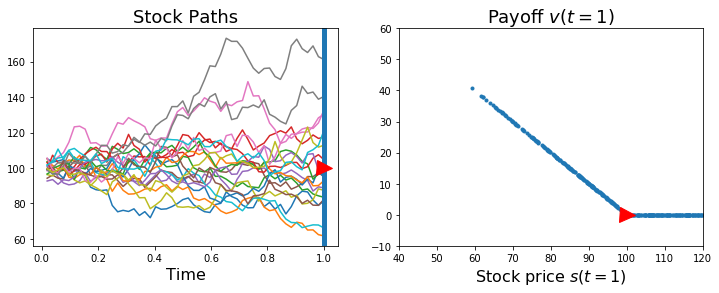

In [14]:
idx = -1

fig = figure(figsize=[12, 4])
ax1 = fig.add_subplot(121)
plot(ts, spath[:20, :].T, label=None)
axvline(ts[idx], lw=5, label=None)
plot(ts[idx], k - b_b[idx], 'r>', ms=15)
xlabel('Time', fontsize=16)
title('Stock Paths', fontsize= 18)

subplot(1, 2, 2)
plot(spath[:500,idx], cvs[:500, idx], '.')
xlim(40, 120)
ylim(-10, 60)
plot(k, 0, 'r>', ms=15)
xlabel('Stock price $s(t = %g)$' % ts[idx], fontsize=16)
title('Payoff $v(t = %g)$' % (ts[idx]), fontsize=18);

## One step before of maturity

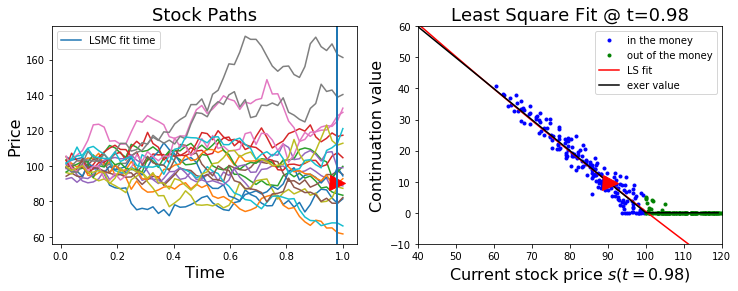

In [15]:
def show_lsmc_step(idx, ne=500) :
    fig = figure(figsize=[12, 4])
    ax1 = fig.add_subplot(121)
    plot(ts, spath[:20, :].T, label=None)
    plot(ts[idx], k - b_b[idx], 'r>', ms=15, label=None)
    axvline(ts[idx], lw=2)
    xlabel('Time', fontsize=16)
    ylabel('Price', fontsize=16)
    title('Stock Paths', fontsize=18)
    legend(['LSMC fit time'], loc='best')

    subplot(1, 2, 2)

    s = spath[:, idx]
    cv = cvs[:, idx+1]
    u = mc.fit_u(s, cv, put_ev(s))
    sd = np.arange(10., 120., 1)

    itm = np.greater(k, s[:ne])
    otm = np.greater(s[:ne], k)

    plot(s[:ne][itm], cv[:ne][itm], 'b.');
    plot(s[:ne][otm], cv[:ne][otm], 'g.');
    plot(sd, u(sd), 'r')
    plot(sd, np.maximum(k-sd, 0), 'k')
    plot(k - b_b[idx], b_b[idx], 'r>', ms=15)

    legend(['in the money', 'out of the money', 'LS fit', 'exer value']);
    xlim(40, 120)
    ylim(-10, 60)
    xlabel('Current stock price $s(t=%.2f)$' % (ts[idx]), fontsize=16);
    ylabel('Continuation value', fontsize=16)
    title('Least Square Fit @ t=%.2f' % (ts[idx]), fontsize=18);
    
show_lsmc_step(-2)

* the red line is a polynomial best fit to the continuation values (in the money paths only, blue dots)
* the option is exercised if the exercise value (black line) is greater than the best guess (red line)
* $\bs v(t_{m-1})$ is known for each simulated path using the exercise decision
* $\bs v(t_{m-1})e^{-r\delta}$ is therefore the continuation value (c.v.) at $t_{m-2}$

## Two steps before maturity

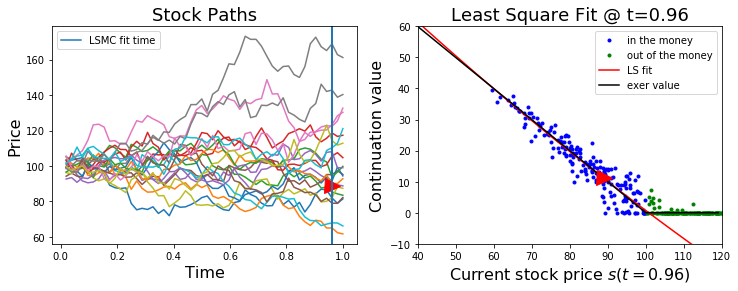

In [16]:
show_lsmc_step(-3)

## Keep going back in time

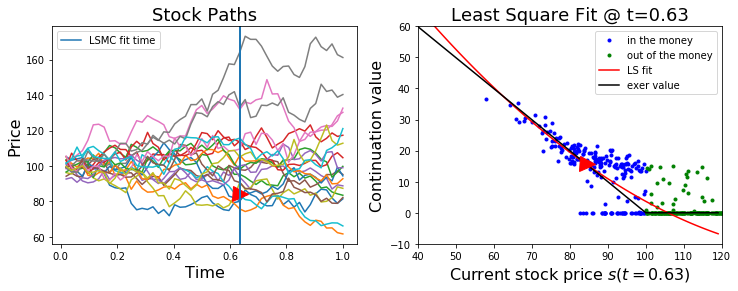

In [17]:
show_lsmc_step(-20)

## Until ...

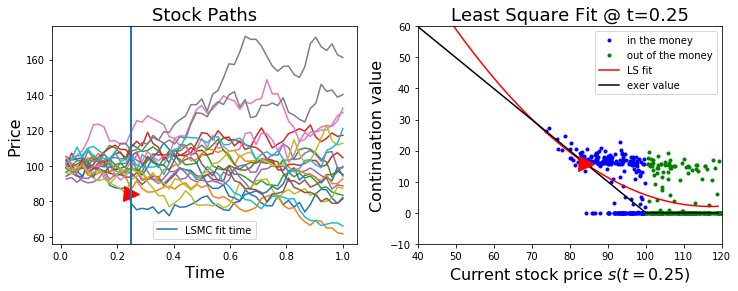

In [18]:
show_lsmc_step(-40)

## Finally

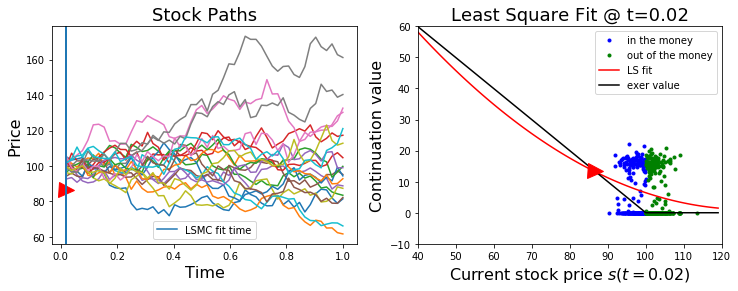

In [19]:
show_lsmc_step(0)

We reached the first time step $t=\delta$, where the option value can be computed as the average of discounted $\bs v(t=\delta)$, i.e., $v =\frac{1}{n} e^{-r\delta}\bs 1^T \bs v(t_0)$.

In [20]:
import fmt

df = pd.DataFrame(np.array([v_b, truv]), index=['LSMC MC', 'True Value'], columns=['American Put'])
fmt.displayDF(df.T, "3f", 3)

,LSMC MC,True Value
American Put,6.493,6.523


* the LSMC result is surprisingly accurate

## Details of the least square
  
at time $t_{m-1}$: $\hs(t_{m-1})$ and the corresponding c.v. $\bs v(t_m)e^{-r\delta}$ are known:
  1. construct a smooth function $u(s; t_{m-1})$ that minimizes 
  
  $$\left\Vert \ind\left(\hs(t_{m-1}) < k\right) \odot \left( u\left(\hs(t_{m-1}); t_{m-1}\right) - \bs v(t_m)e^{-r\delta} \right)\right\Vert_2 $$
  
    * $u(\cdot)$ is an estimate of the option's c.v., based on $\hs(t_{m-1})$
    * $u(s; t_{m-1}) = c_0 + c_1 s + c_2 s^2$, coefficients are solved by least square
    * $\ind(\cdot) \odot$ excludes OTM paths $\rightarrow$ better accuracy
  2. exercise decision is: $\bs e = \ind\left(\left(k - \hs(t_{m-1})\right) > u\left(\hs; t_{m-1}\right)^+\right)$
  3. option value: $ \bs v(t_{m-1}) = \bs e \odot\left(k-\hs(t_{m-1})\right)^+ + (\bs 1 - \bs e) \odot \bs v(t_m)e^{-r\delta}$
    * $\bs v(t_{m-1})e^{-r\delta}$ is therefore the c.v. at $t_{m-2}$
    
$\odot$ is element wise vector multiplication.

## Exercise boundary

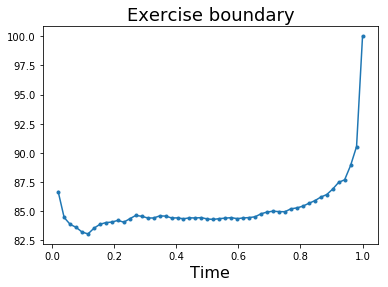

In [21]:
plot(ts, k-b_b, '.-')
xlabel('Time', fontsize=16)
title('Exercise boundary', fontsize=18);

Exercise boundary is defined by:

$$ u(s; t_{m-1}) = c_0 + c_1 s + c_2 s^2  < k - s $$

* it can also be directly obtained from the MC simulation
* the exercise boundary from LSMC is not very accurate (smooth)

## Bias of LSMC

One would think LSMC is biased low because of the inaccurate exercise boundary, is it really?

Consider the following two ways of pricing American option:

1. draw 100,000 paths, estimate the exercise boundary using LSMC 
  1. draw 100,000 new paths, and price the option using the boundary from step 1.
  2. use the same 100,000 paths from step 1 to price the option

## Lower bound

we can conclude the following (barring the discretization and MC errors):
* 1A clearly is a lower bound of American option
* 1B gives a higher value than 1A, because it makes use of the aggregated information of future paths during the least square

Therefore, 1B is not necessarily a lower bound, due to the offsetting effects.
* 1B is preferred over 1A because of faster speed and less bias 

In [22]:
def fixed_b(s, cv, ev) :
    fixed_b.idx -= 1
    return np.greater(ev, fixed_b.b[fixed_b.idx])

fixed_b.b = b_b
fixed_b.idx = -1

v_a, e_a, b_a, _ = mc.amer_opt(spath2, exp(-r*dt), put_ev, fixed_b)

## Upper bound

Given that 1A is a reliable lower bound, it is useful to find an upper bound:
* so that the true solution can be bucketed
* the perfect foresight estimator is an upper bound, but it is too crude.

We present a simple upper bound that is the most useful when the exercise boundary has simple topology.
* more sophisticated upper bound is available in the literature

A more precise upper bound can be found by solving for the optimal exercise boundary $b^*(t)$ by going **backwards** from the simulated paths:

1. set $b^*(t_m) = k$, $v(t_m) = (k-\bs s(t_m))^+$, same as before
2. step back to $t_{m-1}$
  1. the exercise decision $\bs e = \ind \left(\bs s < b^*(t_{m-1})\right)$
  1. the option value is therefore $ \bs v(t_{m-1}) = \bs e \odot\left(k-\hs(t_{m-1})\right)^+ + (\bs 1 - \bs e) \odot \bs v(t_m)e^{-r\delta}$
  2. find the $b^*$ that maximize the average of $\bs v(t_{m-1})$, this can be easily solved by 1-D direct search
3. repeat till reaching $t_0$, and the option value is the average of $\bs v(t_0)$

## Bounded values


This results in an upper bound because we did use the future information when solving for $b^*(t)$. 
* the resulting boundary is more optimal than the true exercise boundary for this set of stock paths
* the resulting valuation bounds are very tight, they did bracket the true value of 6.52 (subject to Monte Carlo noise)

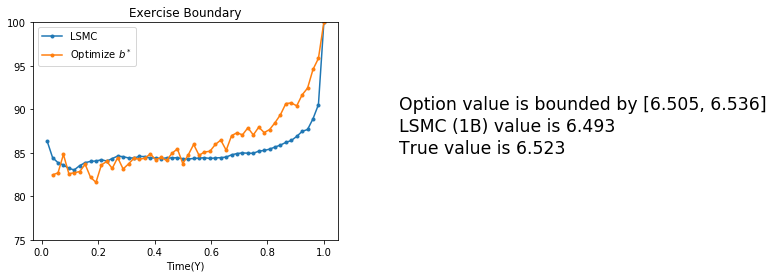

In [23]:
fig = figure(figsize=[12, 4])
subplot(1, 2, 1)

plot(ts, k-np.transpose([b_a, b_u]), '.-')
xlabel('Time(Y)')
title('Exercise Boundary')
legend(['LSMC', 'Optimize $b^*$'], loc='best');
ylim(75, 100);

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(0, .6, "Option value is bounded by [%.3f, %.3f]" % (v_a, v_u), size="xx-large")
ax.text(0, .5, "LSMC (1B) value is %.3f" % v_b, size="xx-large");
ax.text(0, .4, "True value is %.3f" % truv, size="xx-large");

## Error of LSMC

The path-wise LSMC values are dependent
 * through the estimate of exercise boundaries

To estimate the exact LSMC error, we have to use batching

* repeat the LSMC 10 times using 100,000 sample paths each
* we also report the MC error using the independence assumptions
* the (incorrect) independence assumption only leads to a slight over-estimation of the MC error

In [24]:
def lsmc_batch(b, n) :
    bvs = []
    errs = []

    spath2 = gbm.draw(np.random.normal(size=[n, m]), s0, dt)
    disc1p = exp(-r*dt)
    
    for i in range(b) :
        spath = gbm.draw(np.random.normal(size=[n, m]), s0, dt)
        
        v_b, e_b, b_b, _ = mc.amer_opt(spath, disc1p, put_ev, mc.fit_ex)
        v_u, e_u, b_u, _ = mc.amer_opt(spath, disc1p, put_ev, mc.opt_ex)
        
        fixed_b.b = b_b
        fixed_b.idx = len(b_b)
        
        v_a, e_a, b_a, _ = mc.amer_opt(spath2, disc1p, put_ev, fixed_b)
        
        bvs.append((v_a, v_b, v_u))
        errs.append((e_a, e_b, e_u))
        spath2 = spath
        
    return np.array(bvs), np.array(errs)

bvs, errs = lsmc_batch(10, n)

In [25]:
import fmt
import pandas as pd

df = pd.DataFrame(np.concatenate((bvs.T, errs.T)), 
                  columns = ['Batch %d' % (i+1) for i in range(10)],
                  index=['LSMC - LB', 'LSMC', 'LSMC - UB', 
                         'err - LB', 'LSMC err ', 'err - UB'])
sd = np.std(df.T)
u = np.mean(df.T)

df['Batch Mean'] = u
df['Batch Std'] = sd
idx = [0, 1, 2, 4]
fmt.displayDF(df.iloc[idx, :], "3f", 2)

,Batch 1,Batch 2,Batch 3,Batch 4,Batch 5,Batch 6,Batch 7,Batch 8,Batch 9,Batch 10,Batch Mean,Batch Std
LSMC - LB,6.507,6.492,6.486,6.498,6.519,6.511,6.497,6.517,6.486,6.517,6.503,0.012
LSMC,6.506,6.499,6.514,6.530,6.526,6.507,6.528,6.496,6.528,6.537,6.517,0.014
LSMC - UB,6.548,6.540,6.554,6.573,6.563,6.550,6.568,6.533,6.571,6.582,6.558,0.015
LSMC err,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.000


## Final words on LSMC

The main application is exotic options whose exercise decisions depend on multiple factors.
* no need for pricing vanilla 1-D American options, there are far superior methods
* great care are needed for high dimensional applications

# Assignment

Recommended reading:

* Andersen and Piterbarg: Chapter 3.1-3.3

Homework:

* Complete [homework set 6](http://yadongli.github.io/nyumath2048)